# Figure generation for Bird-Beak Paper

In [2]:
from setup import *

# Re-load imports before each cell execution. Allows us to edit helper functions without having to manually reload the module.
%load_ext autoreload
%autoreload 2

In [4]:
# Patient IDs
patients = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
patients = [5] # For debugging

# Location of files
file_path = "/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/kellymeeting20181103/"


## Load files

In [18]:
# File name structures of TEVAR patients.
file_name_root = file_path + 'T{}_pre_ID_{}.csv'  

# Coordinates of aortic contours
aortic_contours_fn = 'contours'

# Curvature and diameter with respect to aortic arclength
arc_curve_diam_cd_fn = 'arc_curve_diam_CD'

# Aortic innerline
aortic_innerline_fn = 'smoothed_innerline'

# Endograft
graft_fn = 'endograft'

# Proximal landing point
plp_fn = 'a1plp'

# Birdbeak data
bbh_data = pd.read_csv('/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/bbh.csv')

# graft_data = pd.read_csv('G.csv')

In [14]:
tevarpats = [1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
pats_excl = [4, 8, 15]
pats_wbbg = [1, 5, 6, 9, 11, 13, 14, 15, 16, 19, 22]
pats_nbbg = list(set(tevarpats)-set(pats_excl)-set(pats_wbbg))
pats_nbbg



[2, 3, 7, 10, 12, 17, 18, 20, 21, 23]

# Figure 5
## a

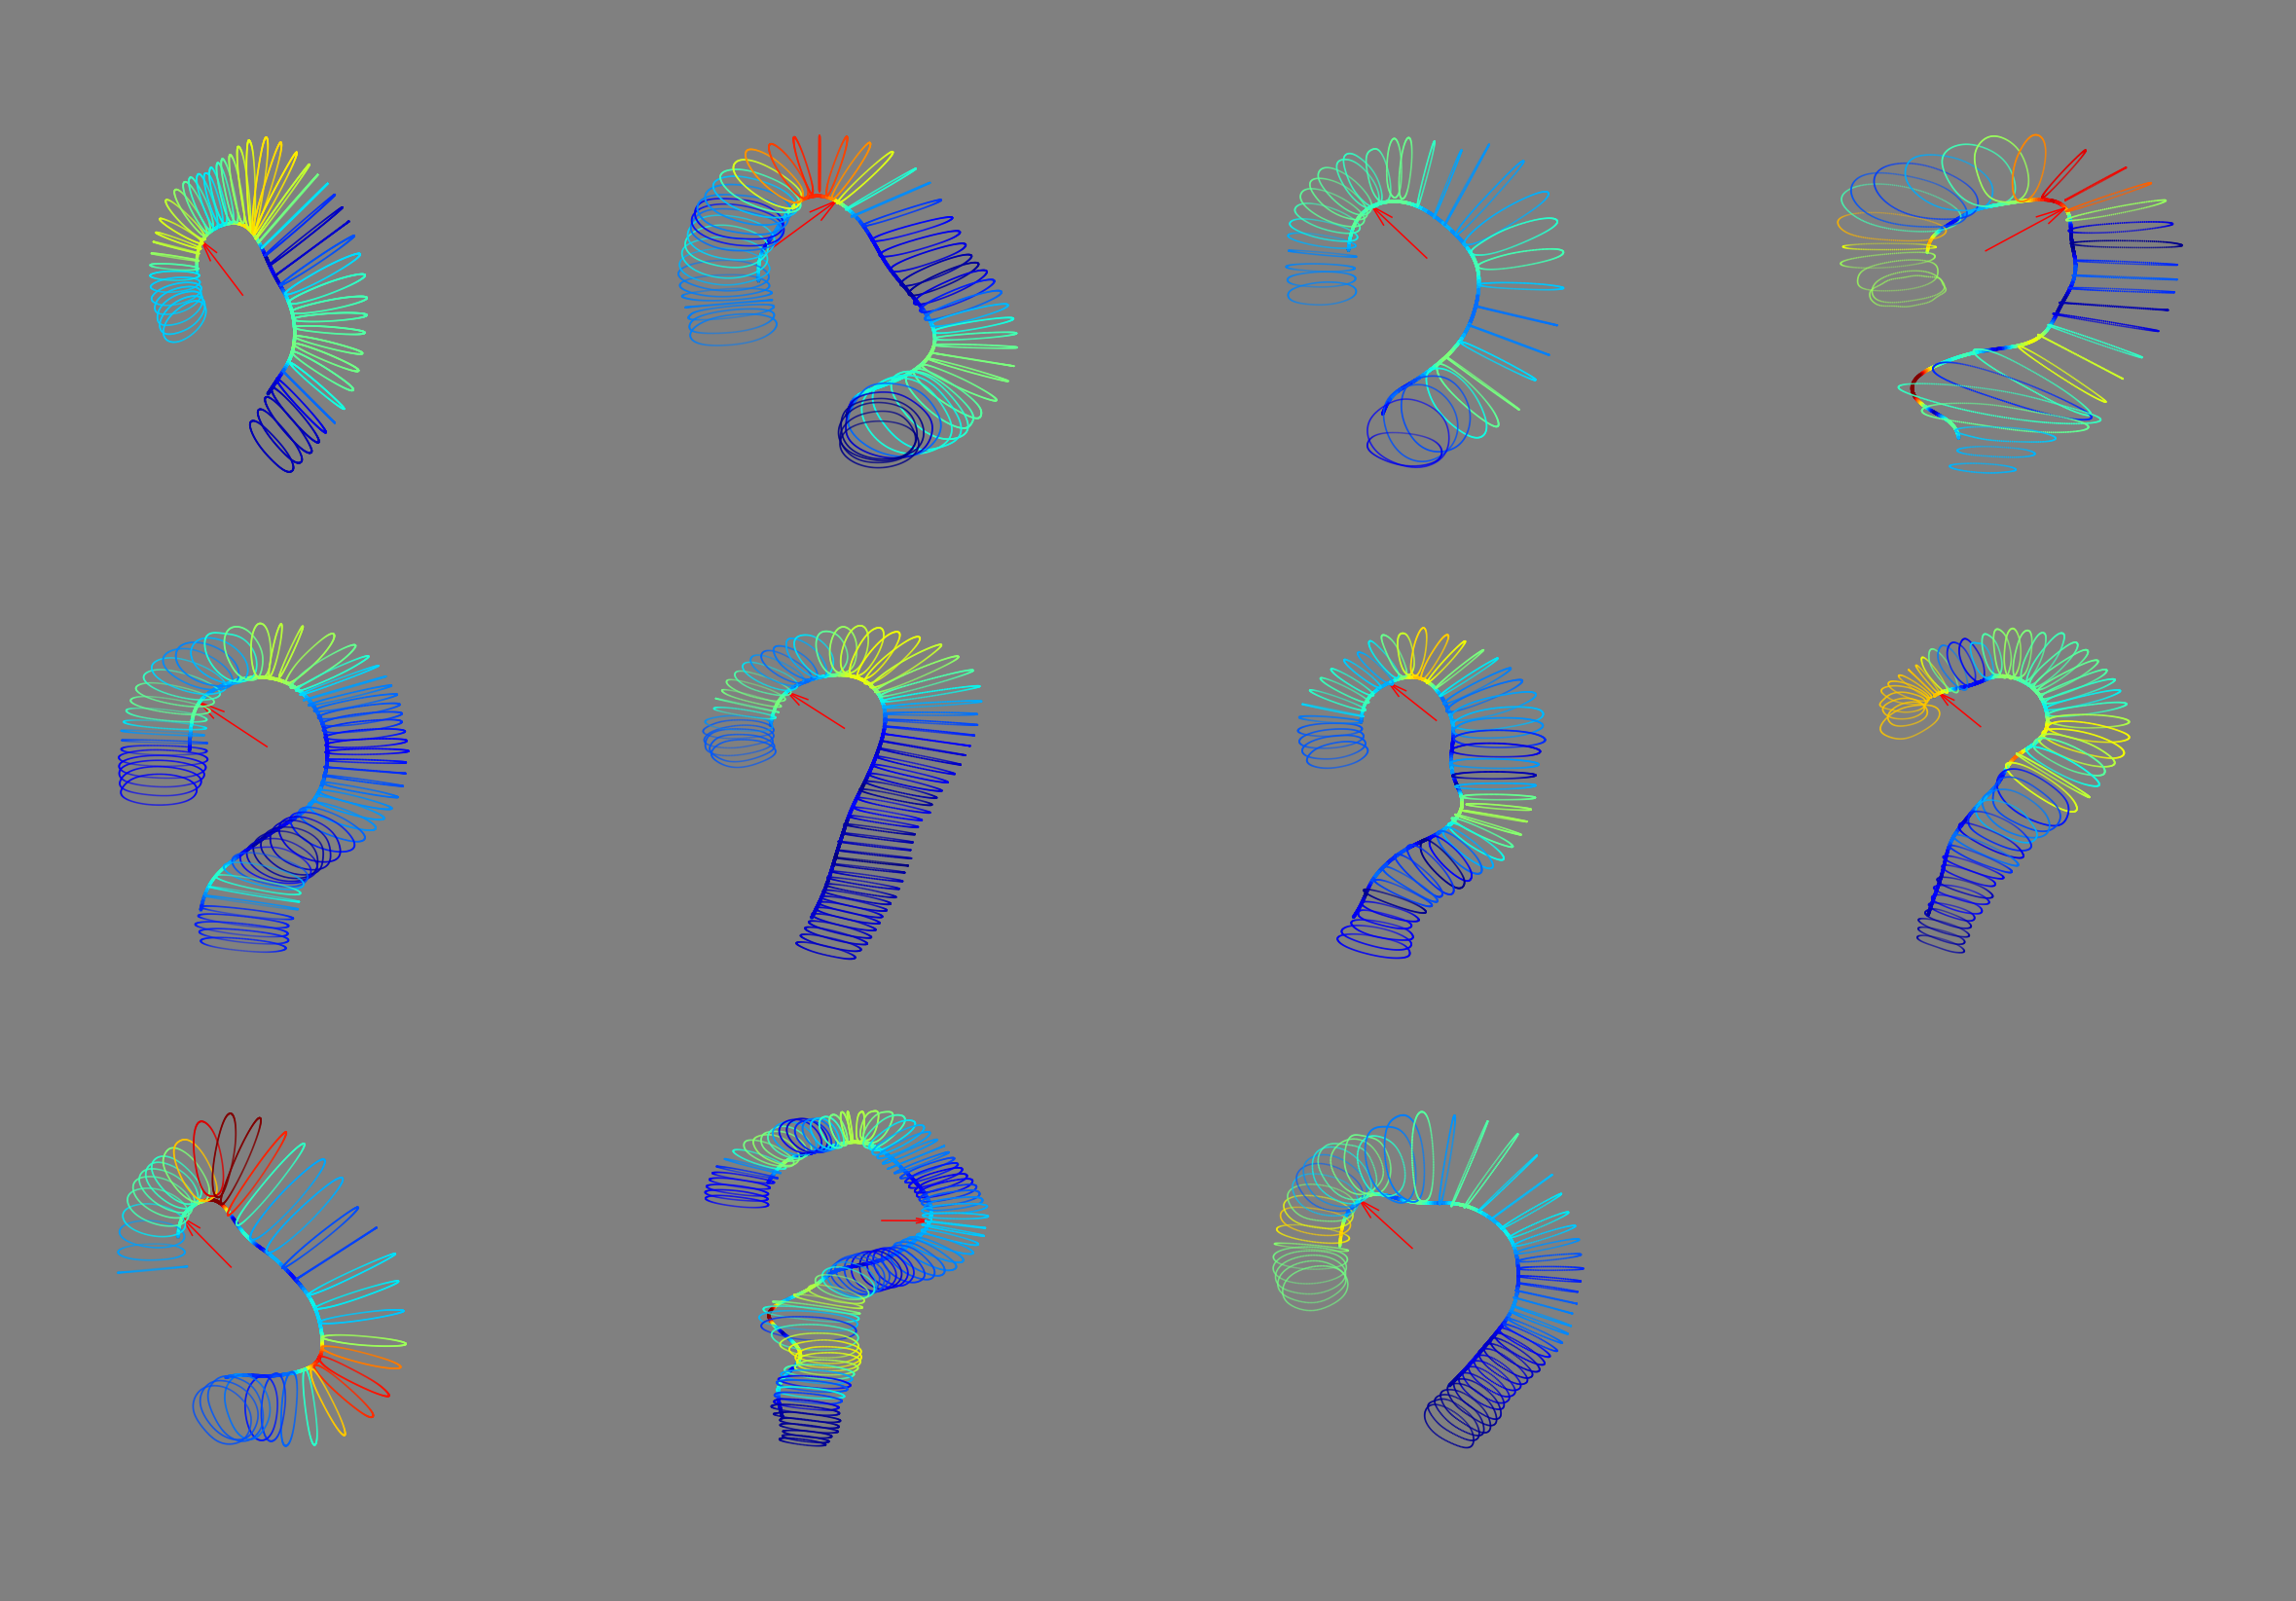

In [15]:
%matplotlib inline
pat_id = 12
min_cd = 0
max_cd = 3
subplotnum = 1
num_plots = len(pats_wbbg)
height = 50
width = 30
fig = plt.figure(figsize=(height, width))
plt.tight_layout()
arrow_vectors = [[0, 1, 1], [0, -1, 1], [0, 1, 1], [0, -1, 1],
                 [0, 1, 1], [0, 1, 1],  [0, 1, 1], [0, 1, 1],
                 [0, 1, 1], [0, -1, 0], [0, 1, 1], [0, 1, 1]]

plt_dims = (3, 4)
gs = gridspec.GridSpec(3,4)
gs.update(wspace=-0.4, hspace=-0.2)
#patients_bb = [1]
for pat_id in pbar(pats_wbbg):
    pat_index = pats_wbbg.index(pat_id)
    arrow_direction_vector = arrow_vectors[pat_index]
    cmap = th.tevar_fig_gen(pat_id,
                     file_name_root,
                     aortic_contours_fn,
                     arc_curve_diam_cd_fn,
                     aortic_innerline_fn,
                     plp_fn,
                     min_cd,
                     max_cd,
                     bbh_data,
                     pat_index,
                     subplotnum,
                     fig,
                     plt_dims, 
                     arrow_direction_vector,
                     gs)
    subplotnum += 1
#fig.colorbar(cmap)
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().set_facecolor([.5,.5,.5])
#fig.patch.set_facecolor([.7,.7,.7])
#plt.savefig('/Users/maxfrohlich/Dropbox/StanfordMatlabDevelopment/pythonDev/figures/aortic_heatmap_subplots.jpeg', dpi=400, bbox_inches='tight', facecolor = fig.get_facecolor(), transparent = True)
plt.show()


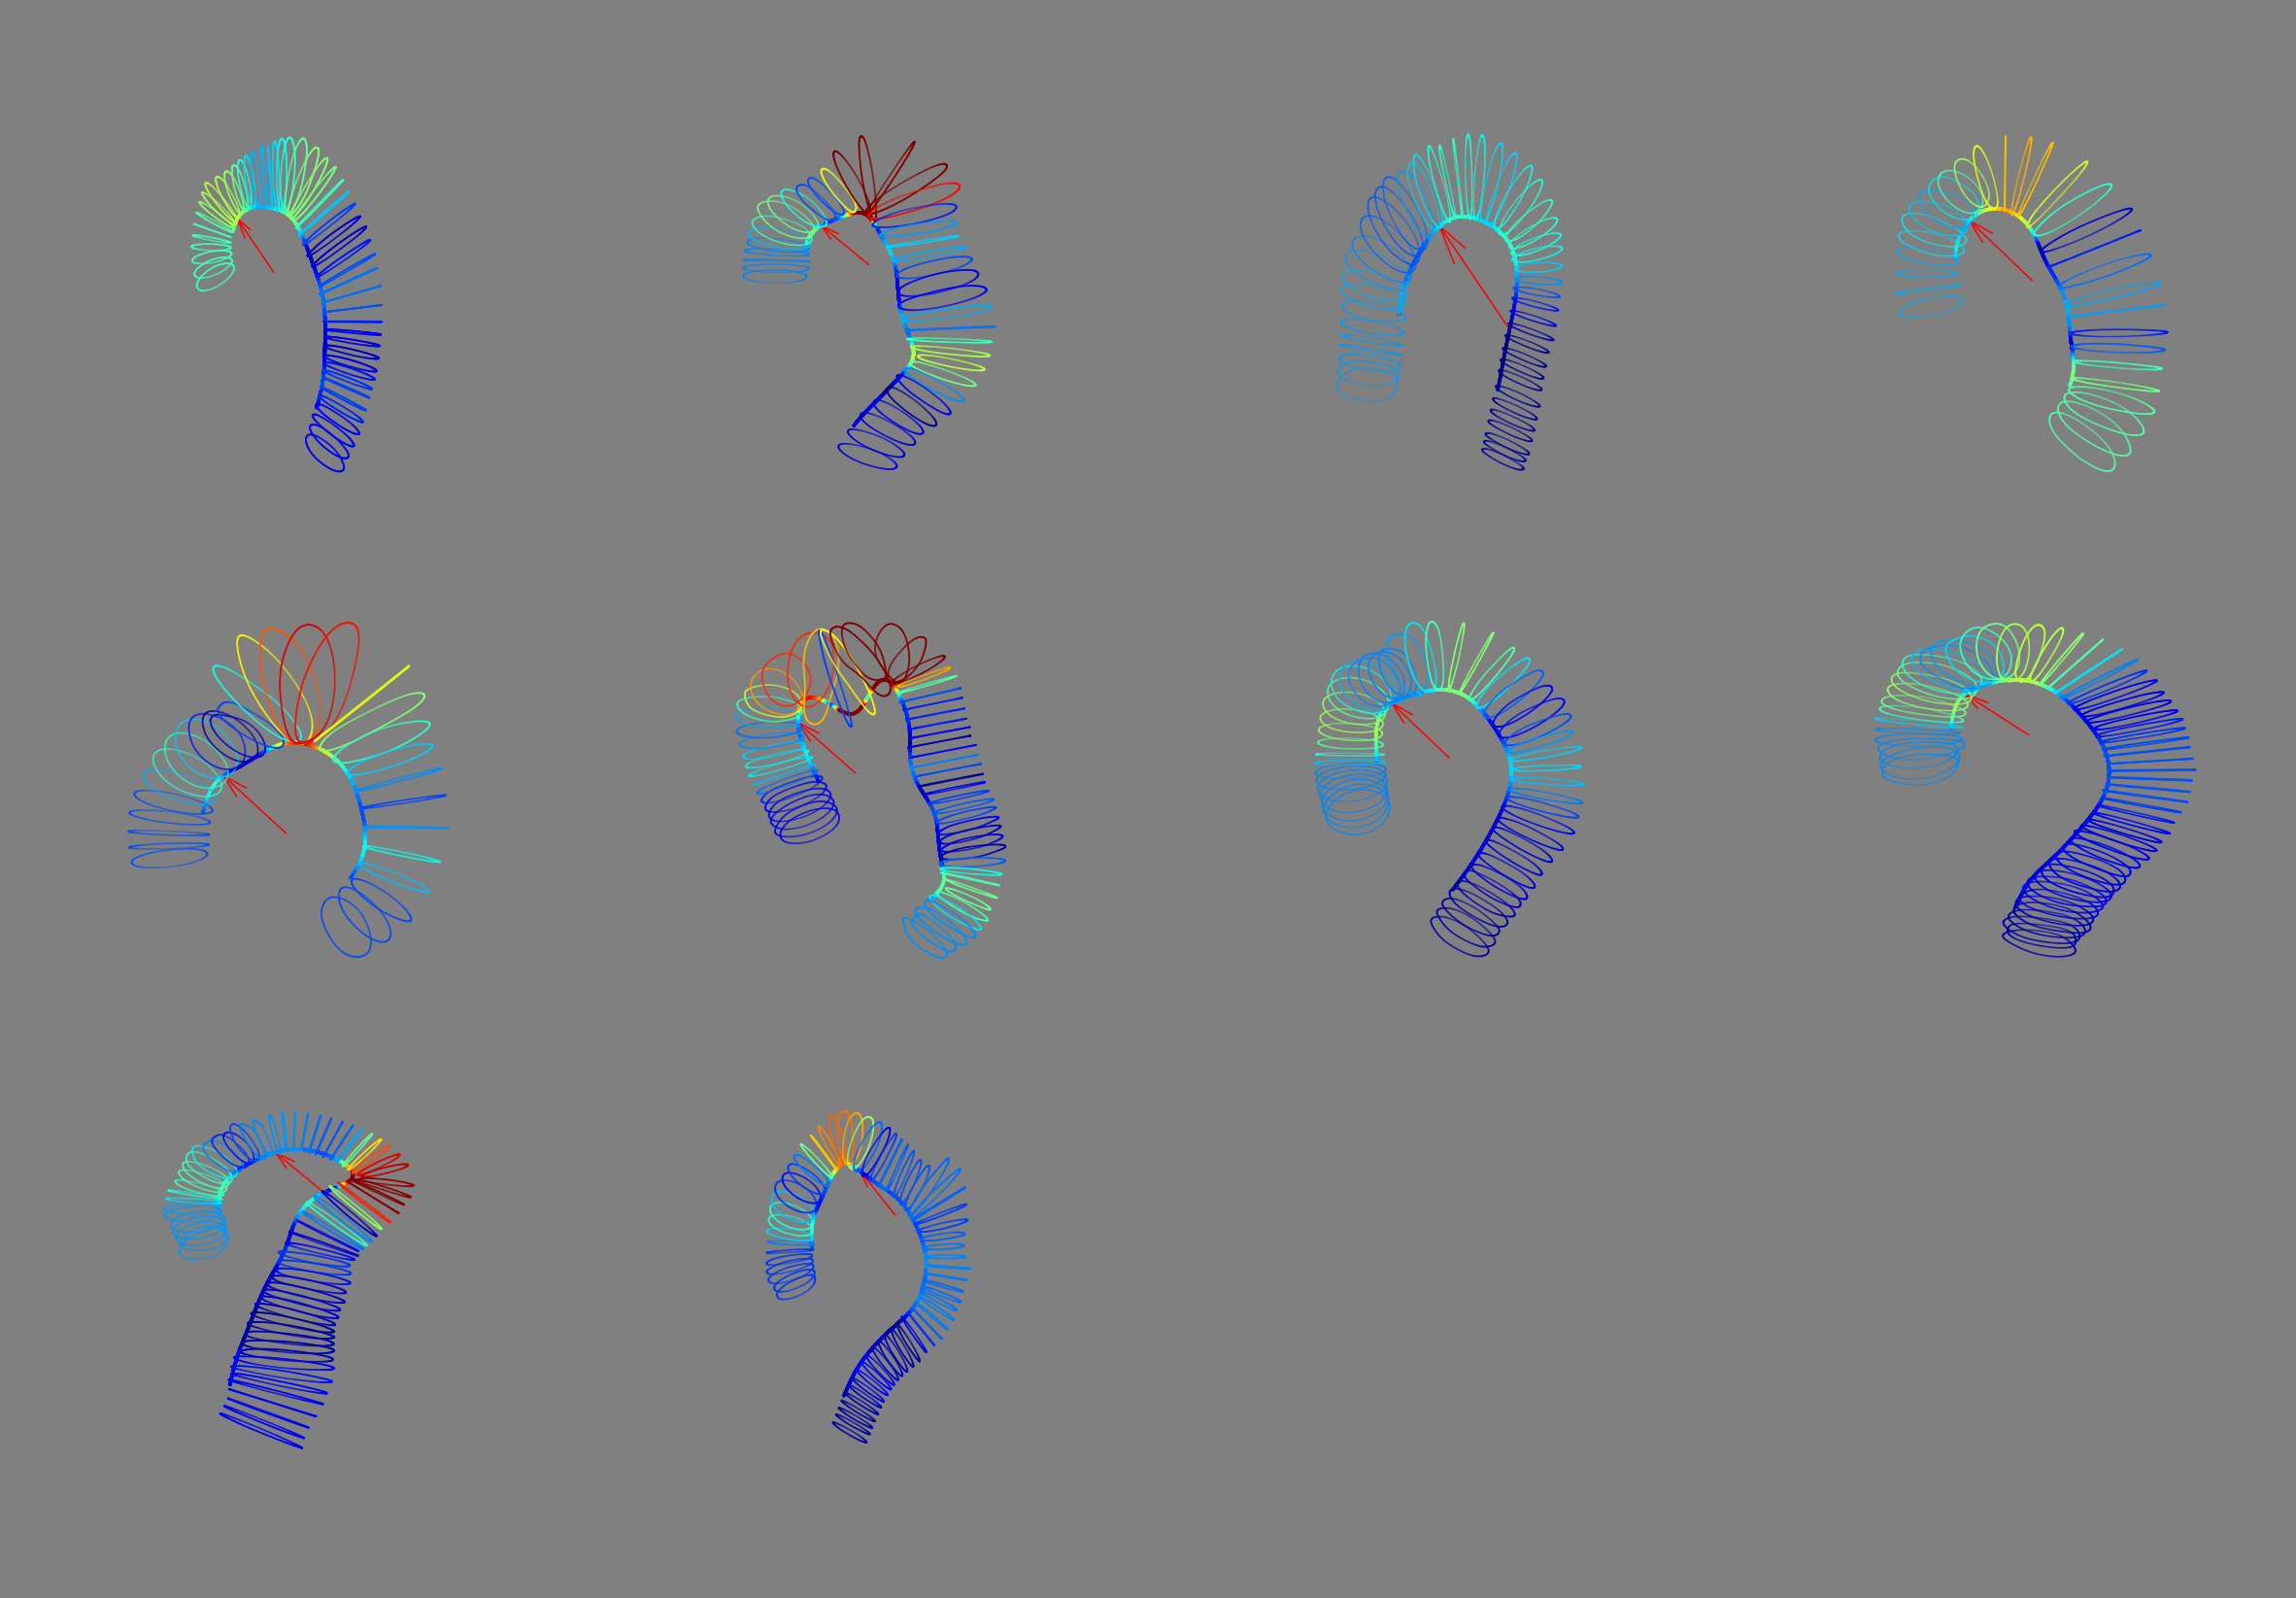

In [29]:
%matplotlib inline
min_cd = 0
max_cd = 3
subplotnum = 1
num_plots = len(pats_nbbg)
height = 50
width = 30
fig = plt.figure(figsize=(height, width))
plt.tight_layout()
arrow_vectors = [[0, 1, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1],
                 [0, 1, 1], [0, 1, 1],  [0, 1, 1], [0, 1, 1],
                 [0, 1, 1], [0, 1, 1], [0, 1, 1], [0, 1, 1]]

plt_dims = (3, 4)
gs = gridspec.GridSpec(3,4)
gs.update(wspace=-0.4, hspace=-0.2)
#patients_bb = [1]
for pat_id in pbar(pats_nbbg):
    pat_index = pats_nbbg.index(pat_id)
    arrow_direction_vector = arrow_vectors[pat_index]
    cmap = th.tevar_fig_gen(pat_id,
                     file_name_root,
                     aortic_contours_fn,
                     arc_curve_diam_cd_fn,
                     aortic_innerline_fn,
                     plp_fn,
                     min_cd,
                     max_cd,
                     bbh_data,
                     pat_index,
                     subplotnum,
                     fig,
                     plt_dims, 
                     arrow_direction_vector,
                     gs)
    subplotnum += 1
#fig.colorbar(cmap)
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().set_facecolor([.5,.5,.5])
#fig.patch.set_facecolor([.7,.7,.7])
plt.savefig('nbbg_heatmap.jpeg', dpi=400, bbox_inches='tight', facecolor = fig.get_facecolor(), transparent = True)
plt.show()
